# Modeling the Run Value of Ground Balls

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

## Finding the Density of Ground Balls By Spray Angle for a Given Velocity

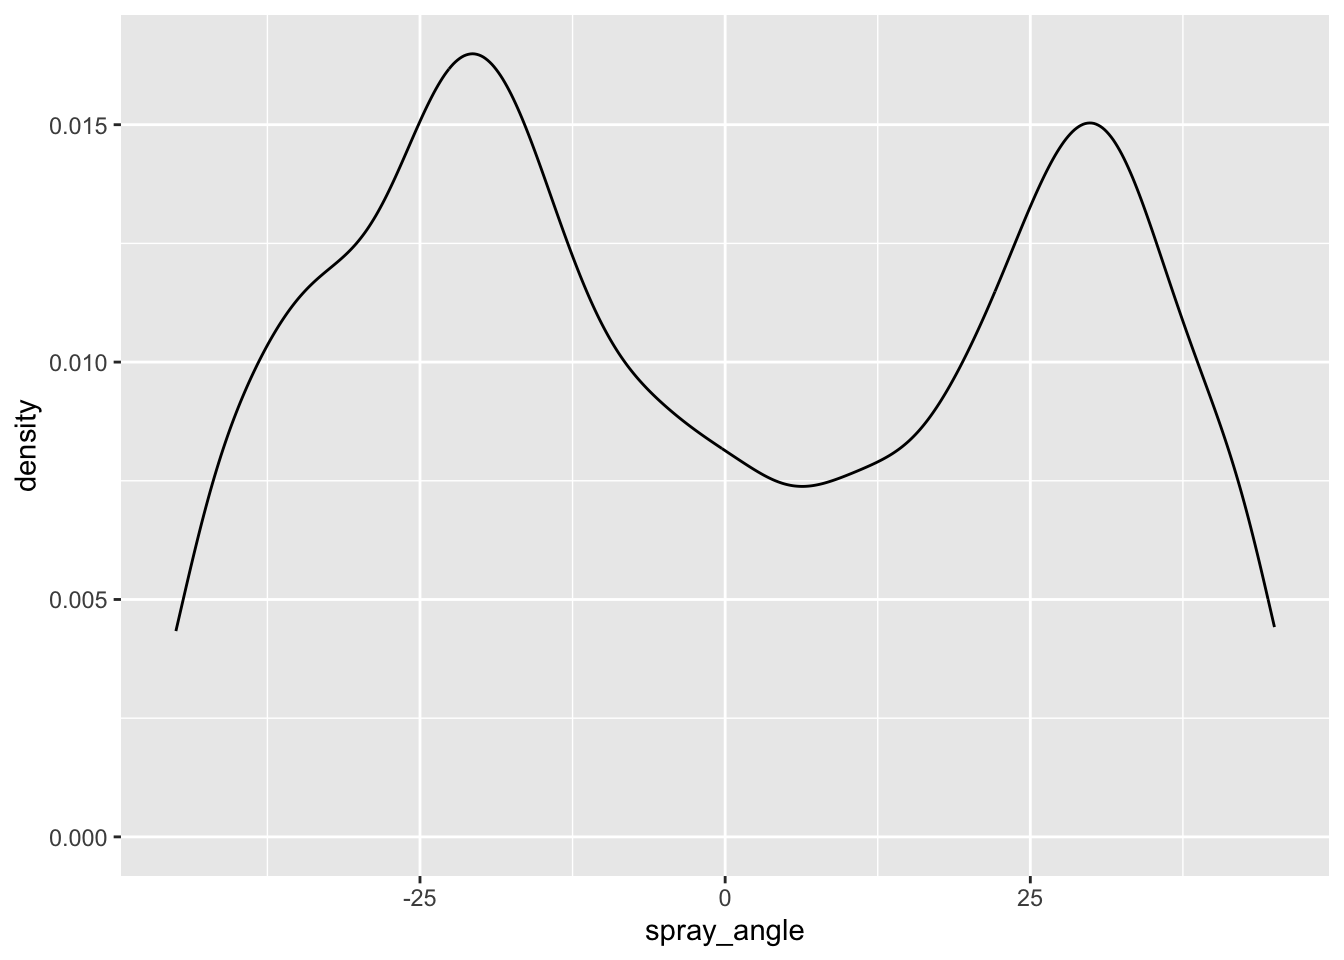

In [ ]:
bip_gb |>
  filter(launch_speed >= 95, launch_speed <= 100) |>
  ggplot(aes(x = spray_angle)) +
  geom_density(alpha = 0.5)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

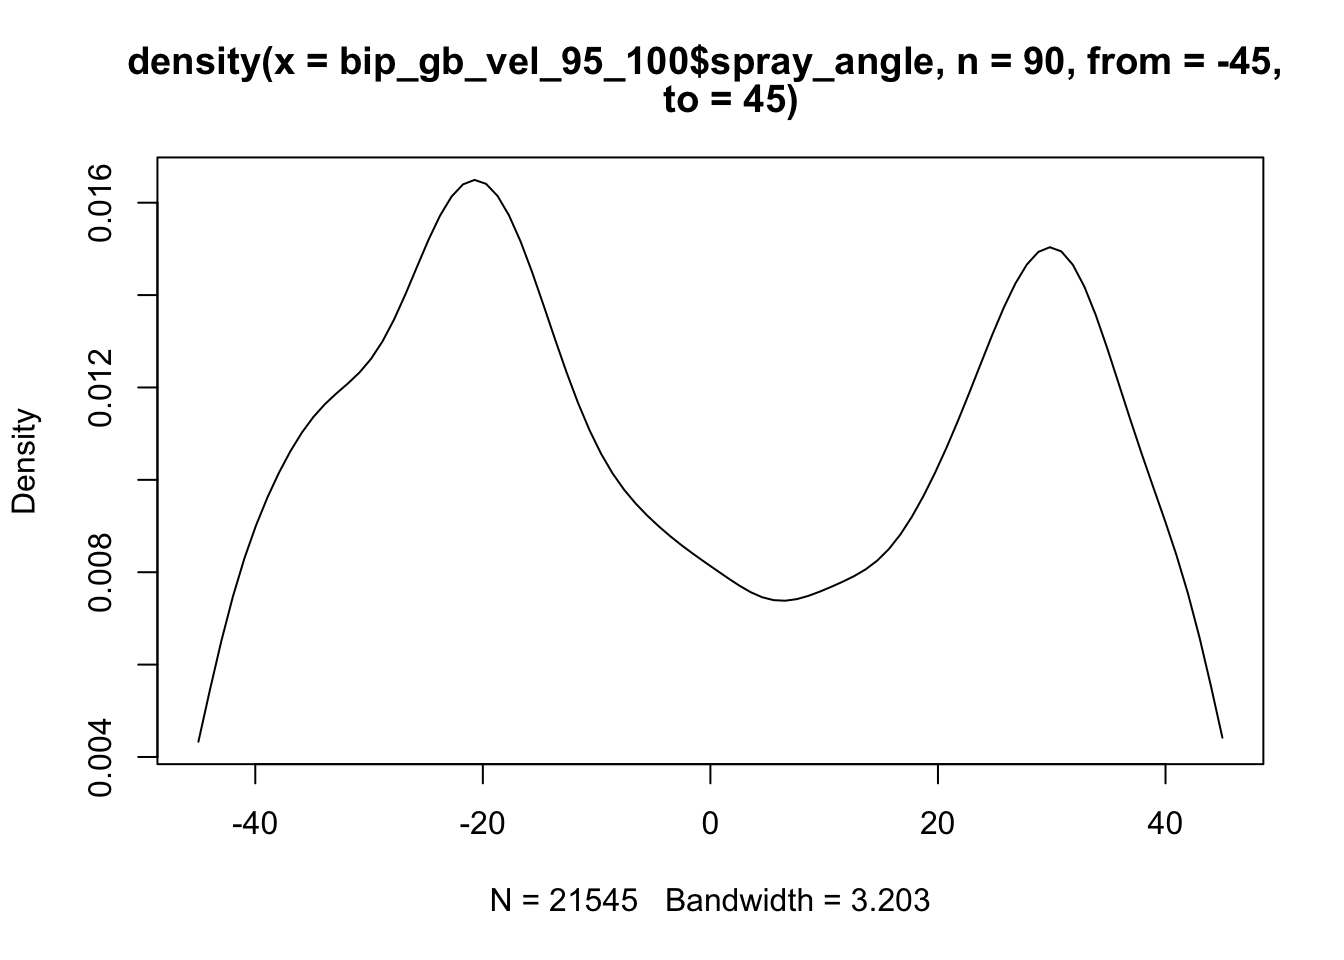

In [ ]:
library(MASS)

## Linear Weights Modeling of Run Values

We want to estimate the run value of a ground ball based on its launch speed and spray angle. We can do this by fitting a linear model where the response variable is the run value of the play (based on the outcome) and the predictors are launch speed and spray angle.

(`geom_point()`).

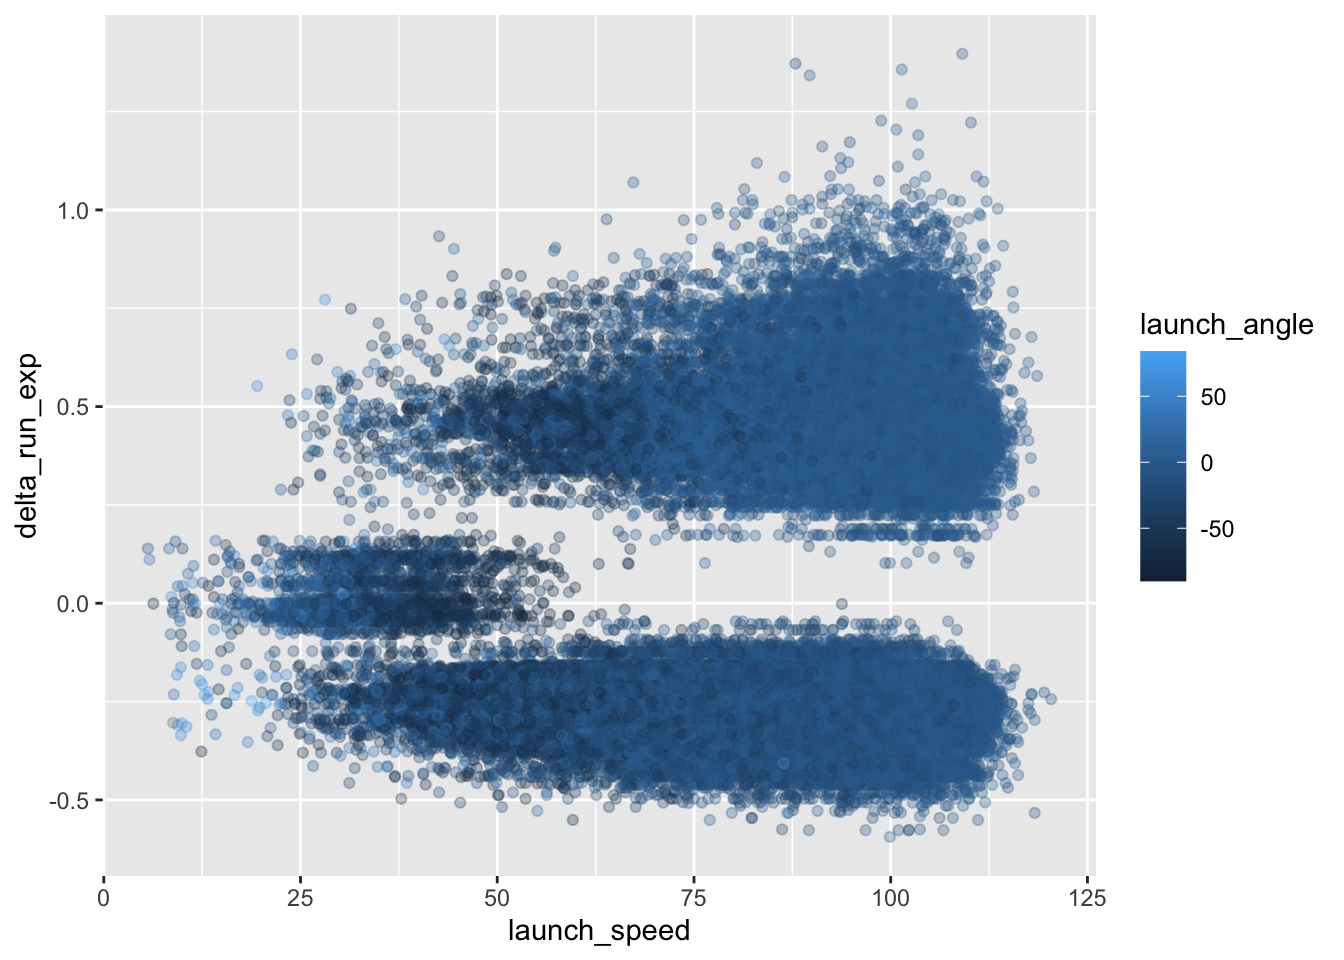

In [ ]:
ggplot(bip_gb, aes(x = launch_speed, y = delta_run_exp, color = launch_angle)) +
  geom_point(alpha = 0.3)

In [ ]:
mod_rv <- gam(delta_run_exp ~ s(launch_speed) + s(spray_angle) + launch_speed:spray_angle, data = bip_gb)
summary(mod_rv)


Family: gaussian 
Link function: identity 

Formula:
delta_run_exp ~ s(launch_speed) + s(spray_angle) + launch_speed:spray_angle

Parametric coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -6.123e-02  8.617e-04  -71.05   <2e-16 ***
launch_speed:spray_angle  2.577e-05  1.937e-06   13.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                  edf Ref.df     F p-value    
s(launch_speed) 8.126  8.695 894.1  <2e-16 ***
s(spray_angle)  8.997  9.000 528.2  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0817   Deviance explained = 8.18%
GCV = 0.10162  Scale est. = 0.10161   n = 144169

## Apply These Run Value Estimates to the Ground Ball Dataset

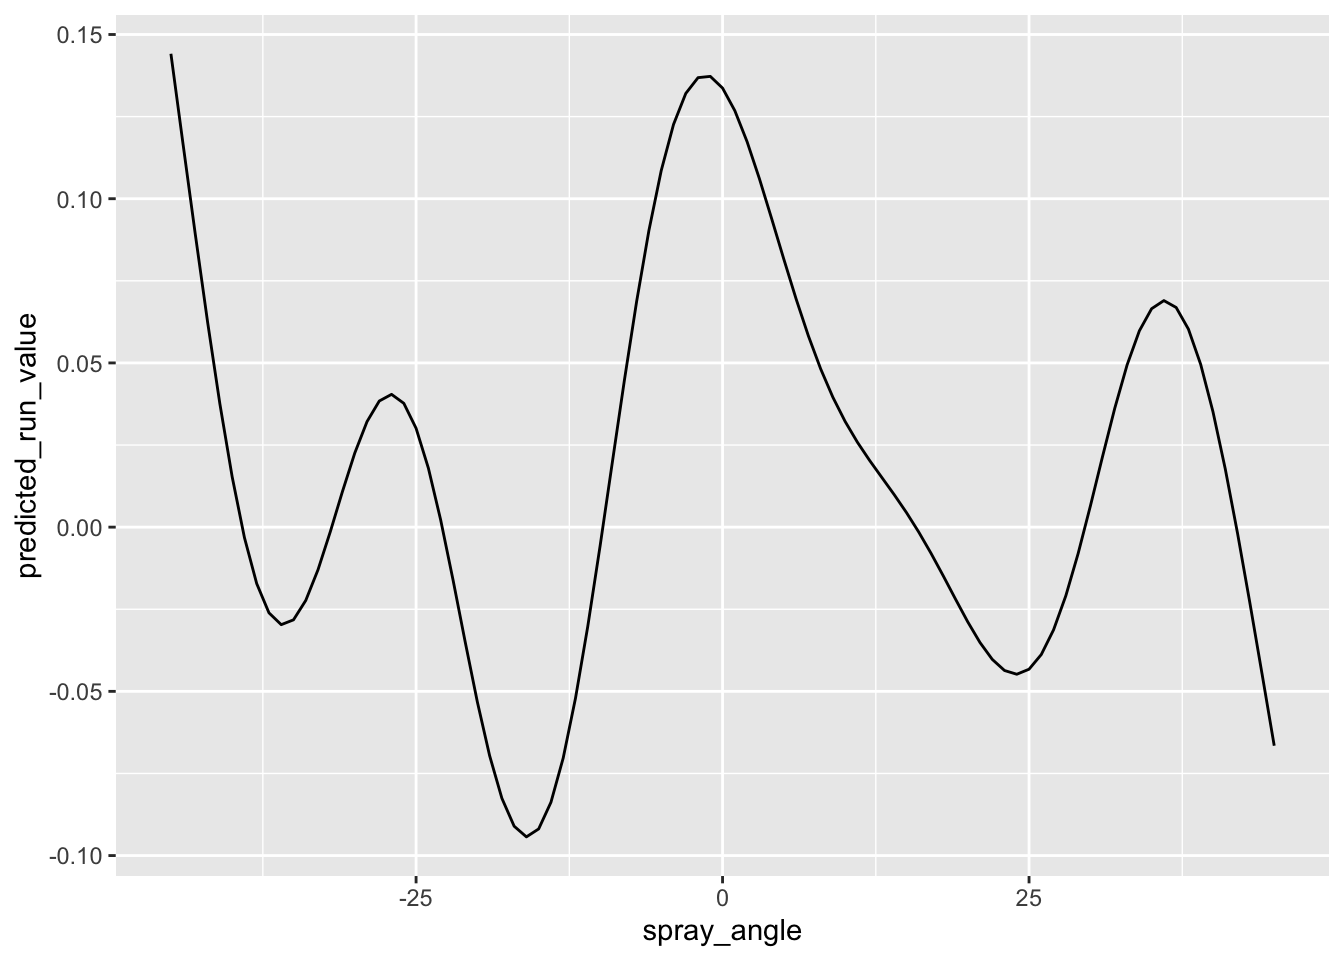

In [ ]:
launch_speed_seq <- seq(50, 110, by = 1)
spray_angle_seq <- seq(-45, 45, by = 1)
new_data <- expand.grid(
  launch_speed = launch_speed_seq,
  spray_angle = spray_angle_seq
)
new_data$predicted_run_value <- predict(mod_rv, newdata = new_data)

new_data |>
  filter(launch_speed == 100) |>
  ggplot(aes(x = spray_angle, y = predicted_run_value)) +
  geom_line()